WEB SCRAPPING - INDEED.COM

Plotting all the job positions on the California State map

Importing libraries

In [2]:
import numpy as np
import pandas as pd

#Setting display rows to Max
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from mpl_toolkits.basemap import Basemap

Reading CSV files

In [3]:
indeed_data_analyst = pd.read_csv('indeed_data_analyst.csv',low_memory=False)
indeed_business_analyst = pd.read_csv('indeed_business_analyst.csv',low_memory=False)
indeed_product_analyst = pd.read_csv('indeed_product_analyst.csv',low_memory=False)

In [4]:
indeed_data_analyst.head()

,Company Name,Job Title,Job Location
0,Giving Assistant,Data Analyst,"San Francisco, CA 94103 (Mission area)"
1,methinks,Data Analyst,"Mountain View, CA"
2,Change Research,Survey Data Analyst,"San Francisco, CA"
3,Change Research,Technical Data Analyst Fellow,"San Francisco, CA"
4,Acumen LLC,Data and Policy Analyst IV (4955663),"Burlingame, CA 94010"


Extracting only names of the cities

In [5]:
indeed_data_analyst['Name']=indeed_data_analyst['Job Location'].astype(str).str.split(',')
for i in range(0,len(indeed_data_analyst['Name'])):
    indeed_data_analyst.iloc[i,3]=indeed_data_analyst.iloc[i,3][0]

In [6]:
indeed_business_analyst['Name']=indeed_business_analyst['Job Location'].astype(str).str.split(',')
for i in range(0,len(indeed_business_analyst['Name'])):
    indeed_business_analyst.iloc[i,3]=indeed_business_analyst.iloc[i,3][0]

In [7]:
indeed_product_analyst['Name']=indeed_product_analyst['Job Location'].astype(str).str.split(',')
for i in range(0,len(indeed_product_analyst['Name'])):
    indeed_product_analyst.iloc[i,3]=indeed_product_analyst.iloc[i,3][0]

In [8]:
indeed_product_analyst.head()

,Company Name,Job Title,Job Location,Name
0,Giving Assistant,Data Analyst,"San Francisco, CA 94103 (Mission area)",San Francisco
1,GradTests (gradtests.com.au),Product Analyst,"San Francisco, CA",San Francisco
2,wepay,Product Strategy & Operations Analyst,"Redwood City, CA 94063 (Downtown area)",Redwood City
3,Meyer Corporation,Product Analyst,"Vallejo, CA 94590",Vallejo
4,Vaco,Data Analyst - Bilingual English and Slovak La...,"Palo Alto, CA",Palo Alto


Loading file with latitudes and longitudes of cities in the US

In [9]:
lat_lon = pd.read_csv('lat_lon.csv',low_memory=False)

In [10]:
lat_lon.head()

,Name,Latitude,Longitude
0,Adelanto,34.582769,-117.409214
1,Agoura Hills,34.153339,-118.761675
2,Alameda,37.765206,-122.241636
3,Albany,37.886869,-122.297747
4,Alhambra,34.095286,-118.127014


In [11]:
indeed_data_analyst = pd.merge(indeed_data_analyst,lat_lon,how='left',on='Name')

In [12]:
null=indeed_data_analyst[indeed_data_analyst.isnull().any(axis=1)]
null['Name'].value_counts()

California             14
Fort Hunter Liggett     9
Universal City          9
Point Mugu              9
China Lake              9
El Dorado Hills         7
Woodland Hills          6
Marina del Rey          1
Hollywood               1
Alameda County          1
Playa Vista             1
Los Angeles County      1
Sylmar                  1
Name: Name, dtype: int64

In [13]:
#Manually inputting latitudes and longitudes for rows with NA

indeed_data_analyst['Latitude'][indeed_data_analyst['Name']=='Alameda County']= 37.7799
indeed_data_analyst['Longitude'][indeed_data_analyst['Name']=='Alameda County']= -122.2822

indeed_data_analyst['Latitude'][indeed_data_analyst['Name']=='Los Angeles County']= 34.0522
indeed_data_analyst['Longitude'][indeed_data_analyst['Name']=='Los Angeles County']= -118.2437

indeed_data_analyst['Latitude'][indeed_data_analyst['Name']=='California']= 36.7783
indeed_data_analyst['Longitude'][indeed_data_analyst['Name']=='California']= -119.4179

indeed_data_analyst['Latitude'].fillna(36.7783, inplace=True)
indeed_data_analyst['Longitude'].fillna(-119.4179, inplace=True)

/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [14]:
null=indeed_data_analyst[indeed_data_analyst.isnull().any(axis=1)]
null['Name'].value_counts()

Series([], Name: Name, dtype: int64)

In [15]:
indeed_data_analyst

,Company Name,Job Title,Job Location,Name,Latitude,Longitude
0,Giving Assistant,Data Analyst,"San Francisco, CA 94103 (Mission area)",San Francisco,37.774931,-122.419417
1,methinks,Data Analyst,"Mountain View, CA",Mountain View,37.386053,-122.083850
2,Change Research,Survey Data Analyst,"San Francisco, CA",San Francisco,37.774931,-122.419417
3,Change Research,Technical Data Analyst Fellow,"San Francisco, CA",San Francisco,37.774931,-122.419417
4,Acumen LLC,Data and Policy Analyst IV (4955663),"Burlingame, CA 94010",Burlingame,37.584103,-122.366083
5,Triplebyte,Data Scientist,"Los Angeles, CA",Los Angeles,34.052233,-118.243686
6,Vaco,Data Analyst - Bilingual English and Slovak La...,"Palo Alto, CA",Palo Alto,37.441883,-122.143019
7,Molina Healthcare,"Analyst, Data","Long Beach, CA",Long Beach,33.768322,-118.195617
8,Intuit,Staff Business Data Analysis,"San Francisco, CA 94102 (Downtown area)",San Francisco,37.774931,-122.419417
9,Rhombus Power Inc.,Strategic Intelligence Analyst/Data Analyst,"Mountain View, CA",Mountain View,37.386053,-122.083850


In [16]:
indeed_product_analyst = pd.merge(indeed_product_analyst,lat_lon,how='left',on='Name')

In [17]:
null=indeed_product_analyst[indeed_product_analyst.isnull().any(axis=1)]
null['Name'].value_counts()

California                18
Woodland Hills            12
Los Angeles County         8
San Francisco Bay Area     2
Canoga Park                1
Playa Vista                1
Tupman                     1
Sylmar                     1
Benicia                    1
Corte Madera               1
Vandenberg AFB             1
Name: Name, dtype: int64

In [18]:
indeed_product_analyst['Latitude'][indeed_product_analyst['Name']=='San Francisco Bay Area']= 37.774931
indeed_product_analyst['Longitude'][indeed_product_analyst['Name']=='San Francisco Bay Area']= -122.419417

indeed_product_analyst['Latitude'][indeed_product_analyst['Name']=='Los Angeles County']= 34.0522
indeed_product_analyst['Longitude'][indeed_product_analyst['Name']=='Los Angeles County']= -118.2437

indeed_product_analyst['Latitude'][indeed_product_analyst['Name']=='California']= 36.7783
indeed_product_analyst['Longitude'][indeed_product_analyst['Name']=='California']= -119.4179

indeed_product_analyst['Latitude'].fillna(36.7783, inplace=True)
indeed_product_analyst['Longitude'].fillna(-119.4179, inplace=True)

/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [19]:
null=indeed_product_analyst[indeed_product_analyst.isnull().any(axis=1)]
null['Name'].value_counts()

Series([], Name: Name, dtype: int64)

In [20]:
indeed_business_analyst = pd.merge(indeed_business_analyst,lat_lon,how='left',on='Name')

In [21]:
null=indeed_business_analyst[indeed_business_analyst.isnull().any(axis=1)]
null['Name'].value_counts()

El Dorado Hills           4
San Francisco Bay Area    1
Name: Name, dtype: int64

In [22]:
indeed_business_analyst['Latitude'][indeed_business_analyst['Name']=='San Francisco Bay Area']= 37.774931
indeed_business_analyst['Longitude'][indeed_business_analyst['Name']=='San Francisco Bay Area']= -122.419417

indeed_business_analyst['Latitude'].fillna(36.7783, inplace=True)
indeed_business_analyst['Longitude'].fillna(-119.4179, inplace=True)

/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
null=indeed_business_analyst[indeed_business_analyst.isnull().any(axis=1)]
null['Name'].value_counts()

Series([], Name: Name, dtype: int64)

/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/shreyashah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


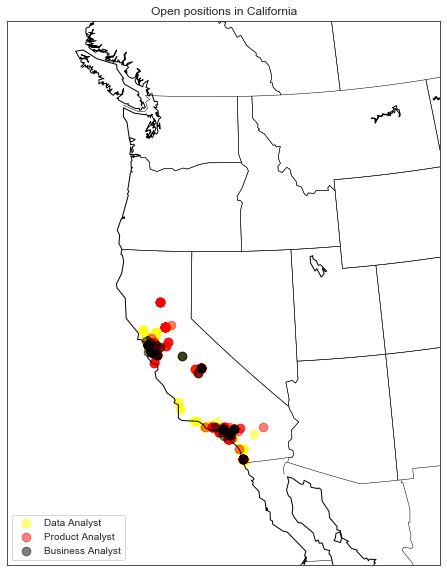

In [45]:
# Use orthographic projection centered on California with corners
# defined by number of meters from center position:
fig= plt.figure(figsize=(15,10))
m  = Basemap(projection='ortho',lon_0=-119,lat_0=37,resolution='l',\
             llcrnrx=-1000*1000,llcrnry=-1000*1000,
             urcrnrx=+1150*1000,urcrnry=+1700*1000)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

x,y = m(indeed_data_analyst['Longitude'].tolist(), indeed_data_analyst['Latitude'].tolist())
m.scatter(x, y, color='yellow',alpha=0.5, label = 'Data Analyst',s=75)


x1,y1 = m(indeed_product_analyst['Longitude'].tolist(), indeed_product_analyst['Latitude'].tolist())
m.scatter(x1, y1, color='red',alpha=0.5, label = 'Product Analyst',s=75)

x2,y2 = m(indeed_business_analyst['Longitude'].tolist(), indeed_business_analyst['Latitude'].tolist())
m.scatter(x2, y2, color='black',alpha=0.5, label = 'Business Analyst',s=75)

plt.legend(loc='lower left')
plt.title('Open positions in California')
plt.show()